In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("dataset.csv", header = None,index_col= False,
                 names=["Likes","Checkin","PageTheme","PageCategory","Derived5","Derived6","Derived7","Derived8","Derived9","Derived10",
                       "Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17","Derived18","Derived19",
                       "Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
                       "CC1","CC2","CC3","CC4","CC5","BaseTime","PostLength","PostShareCount","PostPromoStatus","HLocal","PostPublishSun",
                        "PostPublishedMon","PostPublishedTue","PostPublishedWed","PostPublishedThu","PostPublishedFri","PostPublishedSat",
                       "BaseDateTimeSun","BaseDateTimeMon","BaseDateTimeTue","BaseDateTimeWed","BaseDateTimeThu","BaseDateTimeFri","BaseDateTimeSat"
                       ,"Target"])

In [3]:
# classifying the target variable
np.mean(df.loc[:,'Target'])

7.103668103519464

In [4]:
freq = df['Target'].value_counts()

In [5]:
freq_sorted = freq.sort_index(axis = 0, ascending = True)

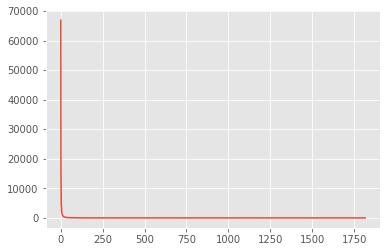

In [6]:
plt.plot(freq_sorted)

In [7]:
data = df.copy(deep=True)

In [8]:
# Classifying anything greater than 0 as class 1 and less than as class 0
data['TargetClass'] = np.where(df['Target'] > 0 , 1, 0)

In [9]:
data.drop(['Target'], axis = 1)

,Likes,Checkin,PageTheme,PageCategory,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PostPublishedFri,PostPublishedSat,BaseDateTimeSun,BaseDateTimeMon,BaseDateTimeTue,BaseDateTimeWed,BaseDateTimeThu,BaseDateTimeFri,BaseDateTimeSat,TargetClass
0,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,14.807018,1.0,110.927036,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121093,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1
121094,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1
121095,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1
121096,7170111,70,497000,9,0.0,2113.0,456.581081,213.5,477.089459,0.0,...,0,0,0,0,0,0,1,0,0,1


In [10]:
# Selecting 17 features as having the highest significance as per the repository info:

X = data.loc[:,['Likes','Checkin','PageTheme','CC1','CC2','CC3','CC4','PostLength','PostShareCount','HLocal','PostPublishSun',
'PostPublishedMon','PostPublishedTue','PostPublishedWed','PostPublishedThu','PostPublishedFri','PostPublishedSat',]]
y = data.loc[:,'TargetClass']
X.head()

,Likes,Checkin,PageTheme,CC1,CC2,CC3,CC4,PostLength,PostShareCount,HLocal,PostPublishSun,PostPublishedMon,PostPublishedTue,PostPublishedWed,PostPublishedThu,PostPublishedFri,PostPublishedSat
0,634995,0,463,0,0,0,0,166,2,24,0,0,0,1,0,0,0
1,634995,0,463,0,0,0,0,132,1,24,0,0,0,0,1,0,0
2,634995,0,463,0,0,0,0,133,2,24,0,0,0,0,0,1,0
3,634995,0,463,7,1,6,7,131,1,24,0,0,0,0,0,1,0
4,634995,0,463,1,0,1,1,142,5,24,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84768, 17)
(84768,)
(36330, 17)
(36330,)


In [12]:
scaled_X_train = X_train.copy(deep=True)
scaled_X_test = X_test.copy(deep=True)


In [13]:
df.shape

(121098, 54)

In [14]:
#Pipeline 1
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(random_state=0))
# scores = cross_val_score(pipe_lr,X_train,y_train,cv=3)
# pipe_lr.fit(X_train, y_train)
# y_pred = pipe_lr.predict(X_test)
# print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
# print(scores.mean())
# model_1 = scores.mean()
# model_1_confusion = confusion_matrix(y_test,y_pred)
# print(model_1_confusion)

In [15]:
#Pipeline2
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_validate
# from sklearn.svm import SVC, LinearSVC
# from sklearn.metrics import confusion_matrix
# pipe_svl = make_pipeline(StandardScaler(),SVC(kernel='linear', C= 1))
# scores = cross_val_score(pipe_svl,X_train,y_train,cv=3)
# pipe_svl.fit(X_train, y_train)
# y_pred = pipe_svl.predict(X_test)
# print('Test Accuracy: %.3f' % pipe_svl.score(X_test, y_test))
# print(scores.mean())
# model_2 = scores.mean()
# model_2_confusion = confusion_matrix(y_test,y_pred)
# print(model_2_confusion)

In [16]:
#Pipeline3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
pipe_svp = make_pipeline(StandardScaler(),SVC(kernel='poly',degree=3))
scores = cross_val_score(pipe_svp,X_train,y_train,cv=3)
pipe_svp.fit(X_train, y_train)
y_pred = pipe_svp.predict(X_test)




In [17]:
# #Pipeline4
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_validate
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix
# c = [0.0001,0.1,1]
# for i in c:
#     pipe_svs_i = make_pipeline(StandardScaler(),SVC(kernel='sigmoid', degree = i))
#     scores = cross_val_score(pipe_svs_i,X_train,y_train,cv=3)
#     pipe_svs_i.fit(X_train, y_train)
#     y_pred = pipe_svs_i.predict(X_test)
#     print('Test Accuracy: %.3f' % pipe_svs_i.score(X_test, y_test))
#     print(scores.mean())
#     model_4_i = scores.mean()
#     model_4_confusion = confusion_matrix(y_test,y_pred)
#     print(model_4_confusion)

In [18]:
#Pipeline5
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
pipe_nb = make_pipeline(StandardScaler(),GaussianNB(random_State=0))
scores = cross_val_score(pipe_nb,X_train,y_train,cv=3)
pipe_nb.fit(X_train, y_train)
y_pred = pipe_nb.predict(X_test)
print('Test Accuracy: %.3f' % pipe_nb.score(X_test, y_test))
print(scores.mean())
model_5 = scores.mean()
model_5_confusion = confusion_matrix(y_test,y_pred)
print(model_5_confusion)

TypeError: __init__() got an unexpected keyword argument 'random_State'

In [ ]:
def print_score1(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [ ]:
# # Kernel SVM
# rbf_clf = SVC()
# from sklearn.model_selection import cross_val_score
# modelAccuracies = cross_val_score(estimator= rbf_clf, X=scaled_X_train, y=y_train, cv=3)
# print(modelAccuracies.mean())

In [ ]:
# rbf_clf.fit(scaled_X_train, y_train)
# y_pred_2 = rbf_clf.predict(scaled_X_test)
# print(confusion_matrix(y_test,y_pred_2))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

In [ ]:
# model2_acc = metrics.accuracy_score(y_test, y_pred_2)

In [ ]:
# Cross validation using SVM
def poly_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='poly', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

P_score1 = poly_svm(scaled_X_train, y_train, 2)
print(np.mean(P_score1['train_score']))
print(np.mean(P_score1['test_score']))
P_score2 = poly_svm(scaled_X_train, y_train, 3)
print(np.mean(P_score2['train_score']))
print(np.mean(P_score2['test_score']))
P_score3 = poly_svm(scaled_X_train, y_train, 4)
print(np.mean(P_score3['train_score']))
print(np.mean(P_score3['test_score']))

In [ ]:
print(np.mean(P_score1['test_score']))
print(np.mean(P_score2['test_score']))
print(np.mean(P_score3['test_score']))

In [ ]:
total_train_acc = []
total_train_acc.append(np.mean(P_score1['train_score']))
total_train_acc.append(np.mean(P_score2['train_score']))
total_train_acc.append(np.mean(P_score3['train_score']))
print(total_train_acc)

total_test_acc = []
total_test_acc.append(np.mean(P_score1['test_score']))
total_test_acc.append(np.mean(P_score2['test_score']))
total_test_acc.append(np.mean(P_score3['test_score']))
print(total_test_acc)


In [ ]:
plt.figure(figsize=(10,7))
plt.title('Accuracy plot for Polynomial Kernel')
plt.xlabel('Degree of polynomial')
plt.ylabel('Accuracy')
c = [2,3,4]
plt.plot(c,total_train_acc, label='Train accuracy')
plt.plot(c,total_test_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')

In [ ]:
# Polynomial kernel
poly_clf = SVC(kernel='poly', degree = 3)
poly_clf.fit(scaled_X_train, y_train)

In [ ]:
y_pred_4 = poly_clf.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_4))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))

In [ ]:
model4_acc = metrics.accuracy_score(y_test, y_pred_4)
model4_confusion = confusion_matrix(y_test,y_pred_4)

In [ ]:
# Cross validation using SVM
def sig_svm(X_train, y_train, C):
    cross_sv = SVC(kernel='sigmoid', degree=C)
    scores = cross_validate(cross_sv, X_train, y_train,cv=3, return_train_score=True)
    return scores

S_score1 = sig_svm(scaled_X_train, y_train, 0.0001)
print(np.mean(S_score1['train_score']))
print(np.mean(S_score1['test_score']))
S_score2 = sig_svm(scaled_X_train, y_train, 0.1)
print(np.mean(S_score2['train_score']))
print(np.mean(S_score2['test_score']))
S_score3 = sig_svm(scaled_X_train, y_train, 1)
print(np.mean(S_score3['train_score']))
print(np.mean(S_score3['test_score']))

In [ ]:
print(np.mean(S_score1['test_score']))
print(np.mean(S_score2['test_score']))
print(np.mean(S_score3['test_score']))

In [ ]:
sig_clf = SVC(kernel='sigmoid', C=1).fit(scaled_X_train, y_train)

In [ ]:
y_pred_5 = sig_clf.predict(scaled_X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_5))
print(confusion_matrix(y_test,y_pred_5))

In [ ]:
model5_acc = metrics.accuracy_score(y_test, y_pred_5)
model5_confusion = confusion_matrix(y_test,y_pred_5)

In [ ]:
np.unique(y_train)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator= NB, X=scaled_X_train, y=y_train, cv=3)
print(modelAccuracies.mean())

In [ ]:
NB.fit(scaled_X_train, y_train)

#Making predictions on the Test Set
y_pred_6 = NB.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred_6))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_6))

In [ ]:
model6_acc = metrics.accuracy_score(y_test, y_pred_6)

In [ ]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    mean_train_acc = 0
    mean_valid_acc = 0
    test_acc = 0
    res = 0
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_validate(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy', return_train_score=True)
        mean_train_acc = res['train_score'].mean()
        mean_valid_acc = res['test_score'].mean()
        print('Average Accuracy for Train data:\t{0:.4f}\n'.format(res['train_score'].mean()))
        print('Average Accuracy for Validation data :\t{0:.4f}'.format(res['test_score'].mean()))
    elif train == False:
        print("\n\nTest results:\n")
        test_acc = accuracy_score(y_test,classifier.predict(X_test))
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
    return mean_train_acc, mean_valid_acc, test_acc, res

In [ ]:
def diff_dep(X_train, y_train, depth, criteria):
    if criteria == True:
        classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
        classifier.fit(X_train,y_train)
    elif criteria == False:
        classifier = DecisionTreeClassifier(criterion='gini', random_state=44, max_depth=depth)
        classifier.fit(X_train, y_train)
    return classifier

In [ ]:
# Classification Trees using Information Gain approach
if_classifier = diff_dep(scaled_X_train, y_train, 3, True)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 5, True)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

if_classifier = diff_dep(scaled_X_train, y_train, 10, True)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(if_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

In [ ]:
if_model_acc = test_acc21
if_res = res20

In [ ]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Information Gain Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Different depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Dataset1_TVT_GainDTree')

In [ ]:
# Classification Trees using GINI Index approach
gini_classifier = diff_dep(scaled_X_train, y_train, 3, False)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 5, False)
mean_train_acc20, mean_valid_acc20, test_acc20, res20 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc21, mean_valid_acc21, test_acc21, res21 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

print("\n ***************************************** \n")

gini_classifier = diff_dep(scaled_X_train, y_train, 10, False)
mean_train_acc30, mean_valid_acc30, test_acc30, res30 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc31, mean_valid_acc31, test_acc31, res31 = print_score(gini_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)

In [ ]:
gini_model_acc = test_acc21
gini_res = res20

In [ ]:
## Plotting the curves of training and test across different depths 
plt.figure()
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.figure(figsize=(10,7))
plt.title("Train Validation & Test Accuracy for Gini Decision tree")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.legend(loc='lower right')

In [ ]:
## Boosting algorithm Implementation
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
svc=SVC(probability=True, kernel='sigmoid')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# AdaBOOST 
boost_classifier = depth_boost(scaled_X_train, y_train)
mean_train_acc10, mean_valid_acc10, test_acc10, res10 = print_score(classifie,scaled_X_train,y_train,scaled_X_test,y_test,train=True)
mean_train_acc11, mean_valid_acc11, test_acc11, res11 = print_score(boost_classifier,scaled_X_train,y_train,scaled_X_test,y_test,train=False)
print("\n ****************************************************** \n")

In [ ]:
boost_model_acc = test_acc21
boost_res = res20

In [ ]:
#Plotting the curves of training and test across different depths 

plt.figure(figsize=(10,7))
total_train_acc = []
total_train_acc.append(mean_train_acc10)
total_train_acc.append(mean_train_acc20)
total_train_acc.append(mean_train_acc30)

total_valid_acc = []
total_valid_acc.append(mean_valid_acc10)
total_valid_acc.append(mean_valid_acc20)
total_valid_acc.append(mean_valid_acc30)

total_test_acc = []
total_test_acc.append(test_acc11)
total_test_acc.append(test_acc21)
total_test_acc.append(test_acc31)

c=[3,5,10]
plt.title("Train, Validation & Test Accuracy for AdaBoost")
plt.plot(c,total_train_acc,label='train_accuracy')
plt.plot(c,total_valid_acc,label='validation_accuracy')
plt.plot(c,total_test_acc, label = 'testing_accuracy')
plt.xlabel('Pruning Depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.savefig('Dataset1_TVTAdaboost')

In [ ]:
accuracy=[model3_acc,model4_acc,model5_acc,model6_acc,if_model_acc,boost_model_acc]
Functions=['SVM_Linear','SVM_Polynomial','SVM_Sigmoid','Naive Bayes','Decision_tree','Adaboost']
plt.figure(figsize=(10,7))
plt.barh(Functions,accuracy,color= (0.2, 0.4, 0.6, 0.6), edgecolor = 'red')
plt.xlabel("Accuracy")
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")